In [1]:
import pandas as pd
counts = pd.read_csv('/home/hsher/scratch/rar11_input.tsv', sep = '\t')
replicates = ['PP_Input1', 'PP_Input2']

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
counts.head()

,Unnamed: 0,seqname,source,feature,start,end,strand,frame,circ_id,circ_type,...,BSJ-PP_Polysome1,BSJ-PP_Polysome2,BSJ-PP_Input2,BSJ-PP_Monosome1,FSJ-PP_Input1,FSJ-PP_Monosome2,FSJ-PP_Polysome1,FSJ-PP_Polysome2,FSJ-PP_Input2,FSJ-PP_Monosome1
0,0,chr1,CIRIquant,circRNA,746695.0,749381.0,-,.,chr1:746695|749381,intron,...,0.0,0.0,24.0,0.0,4.0,0.0,0.0,0.0,42.0,0.0
1,1,chr1,CIRIquant,circRNA,805799.0,810170.0,-,.,chr1:805799|810170,exon,...,0.0,9.0,34.0,11.0,8.0,0.0,0.0,3.0,16.0,1.0
2,2,chr1,CIRIquant,circRNA,915319.0,915949.0,+,.,chr1:915319|915949,intron,...,0.0,0.0,1.0,0.0,51.0,0.0,0.0,0.0,43.0,0.0
3,3,chr1,CIRIquant,circRNA,955923.0,957273.0,-,.,chr1:955923|957273,exon,...,0.0,0.0,2.0,0.0,222.0,15.0,0.0,0.0,220.0,0.0
4,4,chr1,CIRIquant,circRNA,1084353.0,1086012.0,-,.,chr1:1084353|1086012,exon,...,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0


In [4]:
counts.max()

/scratch/hsher/33384802.tscc-mgr7.local/ipykernel_976/303668767.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  counts.max()


Unnamed: 0                           81919
seqname                               chrX
source                           CIRIquant
feature                            circRNA
start                          248916602.0
end                            248917961.0
strand                                   -
frame                                    .
circ_id             chrX:99653827|99660890
circ_type                           intron
BSJ-PP_Input1                      12465.0
BSJ-PP_Monosome2                    4761.0
BSJ-PP_Polysome1                     900.0
BSJ-PP_Polysome2                    2870.0
BSJ-PP_Input2                      11770.0
BSJ-PP_Monosome1                    9767.0
FSJ-PP_Input1                      38687.0
FSJ-PP_Monosome2                   86727.0
FSJ-PP_Polysome1                    1680.0
FSJ-PP_Polysome2                   14861.0
FSJ-PP_Input2                      36014.0
FSJ-PP_Monosome1                   53068.0
dtype: object

In [5]:
counts.loc[counts['BSJ-PP_Input1']==12465]

,Unnamed: 0,seqname,source,feature,start,end,strand,frame,circ_id,circ_type,...,BSJ-PP_Polysome1,BSJ-PP_Polysome2,BSJ-PP_Input2,BSJ-PP_Monosome1,FSJ-PP_Input1,FSJ-PP_Monosome2,FSJ-PP_Polysome1,FSJ-PP_Polysome2,FSJ-PP_Input2,FSJ-PP_Monosome1
66058,66058,chr18,CIRIquant,circRNA,21765772.0,21779685.0,+,.,chr18:21765772|21779685,exon,...,900.0,2870.0,11770.0,9767.0,0.0,0.0,603.0,0.0,0.0,0.0


In [6]:
counts.describe()

,Unnamed: 0,start,end,BSJ-PP_Input1,BSJ-PP_Monosome2,BSJ-PP_Polysome1,BSJ-PP_Polysome2,BSJ-PP_Input2,BSJ-PP_Monosome1,FSJ-PP_Input1,FSJ-PP_Monosome2,FSJ-PP_Polysome1,FSJ-PP_Polysome2,FSJ-PP_Input2,FSJ-PP_Monosome1
count,125726.000000,1.257260e+05,1.257260e+05,125726.000000,125726.000000,125726.000000,125726.000000,125726.00000,125726.000000,125726.000000,125726.000000,125726.000000,125726.000000,125726.000000,125726.000000
mean,35534.000422,7.921319e+07,7.923495e+07,7.353244,1.307717,0.233842,0.691901,7.97699,1.516122,61.458600,13.359027,0.363171,13.742567,68.525078,14.666067
std,23086.259576,5.606843e+07,5.606950e+07,72.095618,20.918795,5.472595,11.625428,74.84249,31.424709,372.518697,421.262759,9.868418,126.555801,384.785962,243.479317
min,0.000000,1.326000e+03,1.337600e+04,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14354.250000,3.493146e+07,3.494271e+07,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34009.500000,6.813128e+07,6.817280e+07,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55570.750000,1.132558e+08,1.132682e+08,3.000000,0.000000,0.000000,0.000000,3.00000,0.000000,18.000000,0.000000,0.000000,0.000000,24.000000,0.000000
max,81919.000000,2.489166e+08,2.489180e+08,12465.000000,4761.000000,900.000000,2870.000000,11770.00000,9767.000000,38687.000000,86727.000000,1680.000000,14861.000000,36014.000000,53068.000000


In [51]:
from itertools import combinations
import statsmodels.formula.api as smf
#https://stackoverflow.com/questions/46173061/statsmodels-throws-overflow-in-exp-and-divide-by-zero-in-log-warnings-and-ps
#extermely large numbers causing problems

nread_threshold = 1000
for (rep1, rep2) in combinations(replicates,2):
    y = f'BSJ-{rep1}'
    x = f'BSJ-{rep2}'
    sub_counts = counts
    
    poisson_training_results = sm.GLM(sub_counts[y], np.log(sub_counts[x]+1), family=sm.families.Poisson()).fit()
    
    # get lambda from Poisson
    sub_counts['BB_LAMBDA'] = poisson_training_results.mu
    sub_counts['AUX_OLS_DEP'] = sub_counts.apply(lambda row: ((row[y] - row['BB_LAMBDA'])**2 - row['BB_LAMBDA']) / row['BB_LAMBDA'], axis=1)
    ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
    aux_olsr_results = smf.ols(ols_expr, sub_counts).fit()
    
    # fit nb
    nb2_training_results = sm.GLM(sub_counts[y], np.log(sub_counts[x]+1),
                                  family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [52]:
aux_olsr_results.tvalues

BB_LAMBDA    0.604592
dtype: float64

In [53]:
aux_olsr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            AUX_OLS_DEP   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.3655
Date:                Thu, 21 Sep 2023   Prob (F-statistic):                       0.545
Time:                        09:45:25   Log-Likelihood:                     -1.1809e+06
No. Observations:              125726   AIC:                                  2.362e+06
Df Residuals:                  125725   BIC:                                  2.362e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BB_LAMBDA      0.0813      0.134      0.605      0.545      -0.182       0.345
==============================================================================
Omnibus:                   715300.375   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   77080378524326.906
Skew:                         345.826   Prob(JB):                         0.00
Kurtosis:                  121302.198   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 100.0)

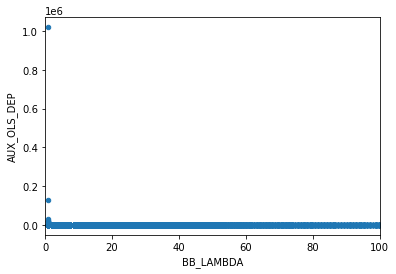

In [54]:
sub_counts.plot.scatter(y = 'AUX_OLS_DEP', x = 'BB_LAMBDA')
plt.xlim(0,100)

In [55]:
nb2_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          BSJ-PP_Input1   No. Observations:               125726
Model:                            GLM   Df Residuals:                   125725
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1269e+05
Date:                Thu, 21 Sep 2023   Deviance:                   3.6504e+05
Time:                        09:45:35   Pearson chi2:                 1.53e+06
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
BSJ-PP_Input2     0.9009      0.001   1204.176      0.000       0.899       0.902
=================================================================================
"""

In [56]:
poisson_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          BSJ-PP_Input1   No. Observations:               125726
Model:                            GLM   Df Residuals:                   125725
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.7327e+05
Date:                Thu, 21 Sep 2023   Deviance:                   5.1440e+05
Time:                        09:45:36   Pearson chi2:                 1.74e+06
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
BSJ-PP_Input2     0.9734      0.000   4547.612      0.000       0.973       0.974
=================================================================================
"""

In [57]:
# for (rep1, rep2) in combinations(replicates,2):
#     y = f'BSJ-{rep1}'
#     x = [f'BSJ-{rep2}', f'FSJ-{rep1}', f'FSJ-{rep2}']
    
#     poisson_training_results_2 = sm.GLM(counts[y], counts[x], family=sm.families.Poisson()).fit()

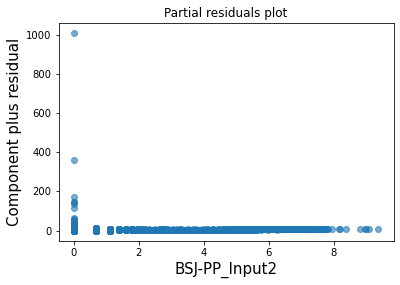

In [58]:
f = poisson_training_results.plot_partial_residuals(x)

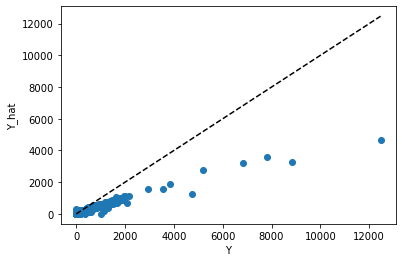

In [59]:
plt.scatter(counts[y], nb2_training_results.predict(np.log(counts[x]+1)),)
plt.xlabel('Y')
plt.ylabel('Y_hat')
plt.plot([0, counts[y].max()], [0, counts[y].max()], '--', color = 'black')

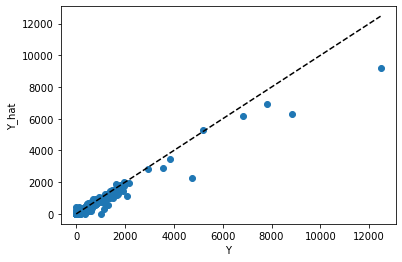

In [60]:
plt.scatter(counts[y], poisson_training_results.predict(np.log(counts[x]+1)))
plt.xlabel('Y')
plt.ylabel('Y_hat')
plt.plot([0, counts[y].max()], [0, counts[y].max()], '--', color = 'black')

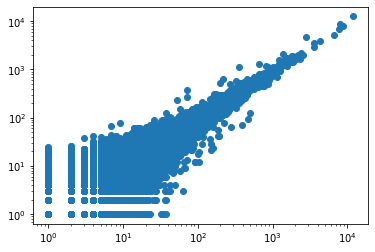

In [61]:
plt.scatter(counts[x], counts[y])
plt.xscale('log')
plt.yscale('log')

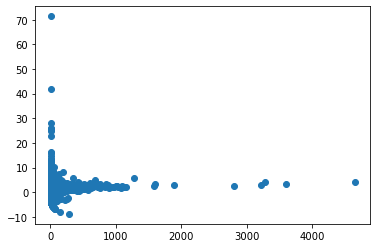

In [62]:
plt.scatter(nb2_training_results.fittedvalues, nb2_training_results.resid_deviance)

<AxesSubplot: xlabel='fitted', ylabel='deviance'>

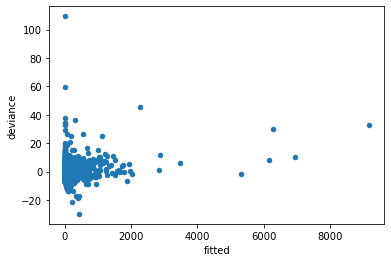

In [92]:
dev = pd.DataFrame([poisson_training_results.fittedvalues, poisson_training_results.resid_deviance],
                  index = ['fitted', 'deviance']).T
dev.plot.scatter(x = f'fitted', y = 'deviance')
dev = pd.concat([dev, sub_counts], axis = 1)

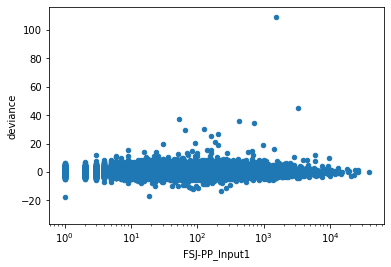

In [88]:
dev.plot.scatter(x = f'FSJ-{rep1}', y = 'deviance')
plt.xscale('log')


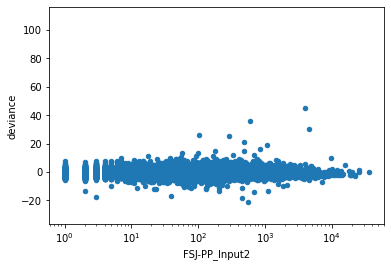

In [89]:
dev.plot.scatter(x = f'FSJ-{rep2}', y = 'deviance')
plt.xscale('log')


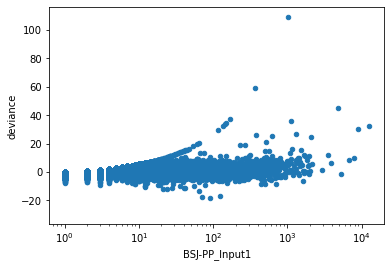

In [90]:
dev.plot.scatter(x = f'BSJ-{rep1}', y = 'deviance')
plt.xscale('log')


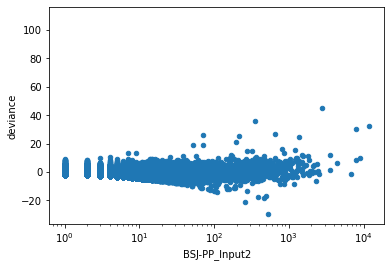

In [91]:
dev.plot.scatter(x = f'BSJ-{rep2}', y = 'deviance')
plt.xscale('log')


In [95]:
sub_counts.iloc[0]

Unnamed: 0                                                          0
seqname                                                          chr1
source                                                      CIRIquant
feature                                                       circRNA
start                                                        746695.0
end                                                          749381.0
strand                                                              -
frame                                                               .
circ_id                                            chr1:746695|749381
circ_type                                                      intron
gene_id                          ENSG00000228327.3,ENSG00000230021.10
gene_name                                       AL669831.1,AL669831.3
gene_type           transcribed_unprocessed_pseudogene,transcribed...
BSJ-PP_Input1                                                    29.0
BSJ-PP_Monosome2    

In [99]:
from scipy.stats import poisson
sub_counts['pvalue']=sub_counts.apply(lambda row: 1-poisson(row['BB_LAMBDA']).cdf(row[f'BSJ-{rep1}']), axis = 1)


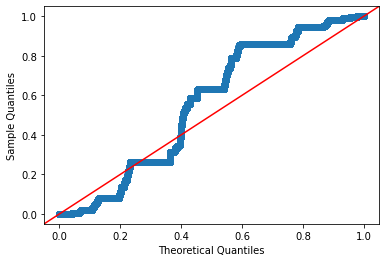

In [101]:
import scipy
p = sm.qqplot(sub_counts['pvalue'], line ='45',
             dist=scipy.stats.uniform)

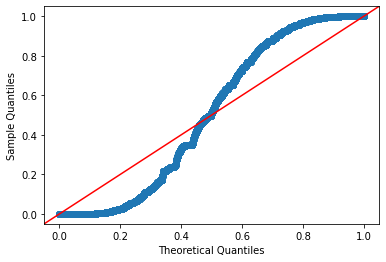

In [106]:

p = sm.qqplot(sub_counts.loc[(sub_counts[y]+sub_counts[x])>10, 'pvalue'], line ='45',
             dist=scipy.stats.uniform)

<AxesSubplot: >

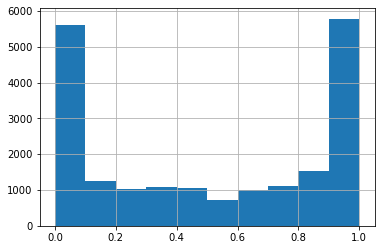

In [107]:
sub_counts.loc[(sub_counts[y]+sub_counts[x])>10, 'pvalue'].hist()

In [109]:
sub_counts.loc[sub_counts['pvalue']==0, [x,y]]

,BSJ-PP_Input2,BSJ-PP_Input1
191,164.0,276.0
951,657.0,1288.0
1187,568.0,681.0
1447,0.0,18.0
1558,0.0,18.0
...,...,...
71681,38.0,122.0
72420,0.0,170.0
73984,1.0,24.0
74678,811.0,1148.0


In [110]:
sub_counts.loc[sub_counts['pvalue']==1, [x,y]]

,BSJ-PP_Input2,BSJ-PP_Input1
170,187.0,42.0
4875,858.0,495.0
11744,770.0,441.0
14248,150.0,28.0
19758,190.0,41.0
26713,279.0,65.0
28510,498.0,123.0
33309,145.0,36.0
39537,389.0,71.0
42439,221.0,77.0
